In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from HBM.CRP import CRP, StickyCRP
from HBM.structures import Feature, Category
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm.auto import tqdm

In [2]:
with open("../data/zoo.csv", "r") as f:
    reader = csv.reader(f)
    data=[]
    for row in reader:
        data.append(row)

In [3]:
feature_labels = data[0][1:]
names = [d[0] for d in data[1:]]
features = [np.array(d[1:]).astype(np.int64) for d in data[1:]]

In [4]:
def run(clusters, feature_labels):
    n_clusters = len(clusters)
    fig, axs = plt.subplots(1, n_clusters, figsize=(3.5 * n_clusters, 6), sharey=True)
    for i, cluster in enumerate(model.clusters):
        values = np.array([item.values for item in cluster.items])
        labels = [item.label for item in cluster.items]
        axs[i].imshow(
            values.T, 
            aspect='equal', 
            vmin=0, vmax=1, 
            cmap='binary'
        )
        axs[i].set_xticks(np.arange(len(labels)))
        axs[i].set_xticklabels(labels, rotation=90, fontsize=6)
        axs[i].set_title(f"Cluster {i}\n({cluster.n} data)")
        axs[i].set_yticks([])
    
    axs[0].set_yticks(np.arange(values.shape[1]))
    axs[0].set_yticklabels(feature_labels)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

0it [00:00, ?it/s]

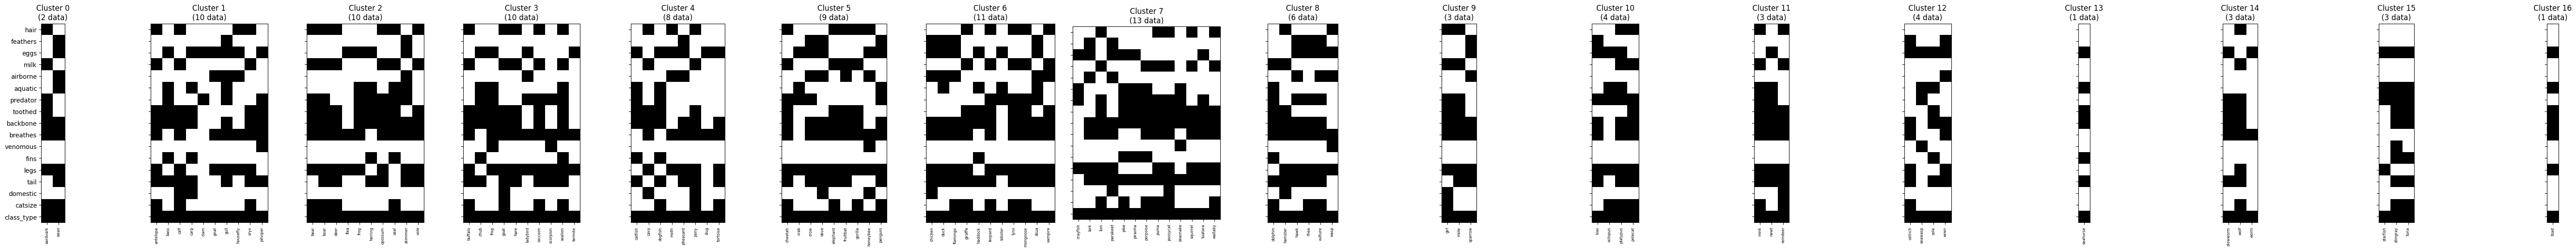

In [5]:
model = CRP(alpha=1, delta=1, strict=False)
for name, feature in tqdm(zip(names, features)):
    model.add(Feature(name, feature))
run(model.clusters, feature_labels)

0it [00:00, ?it/s]

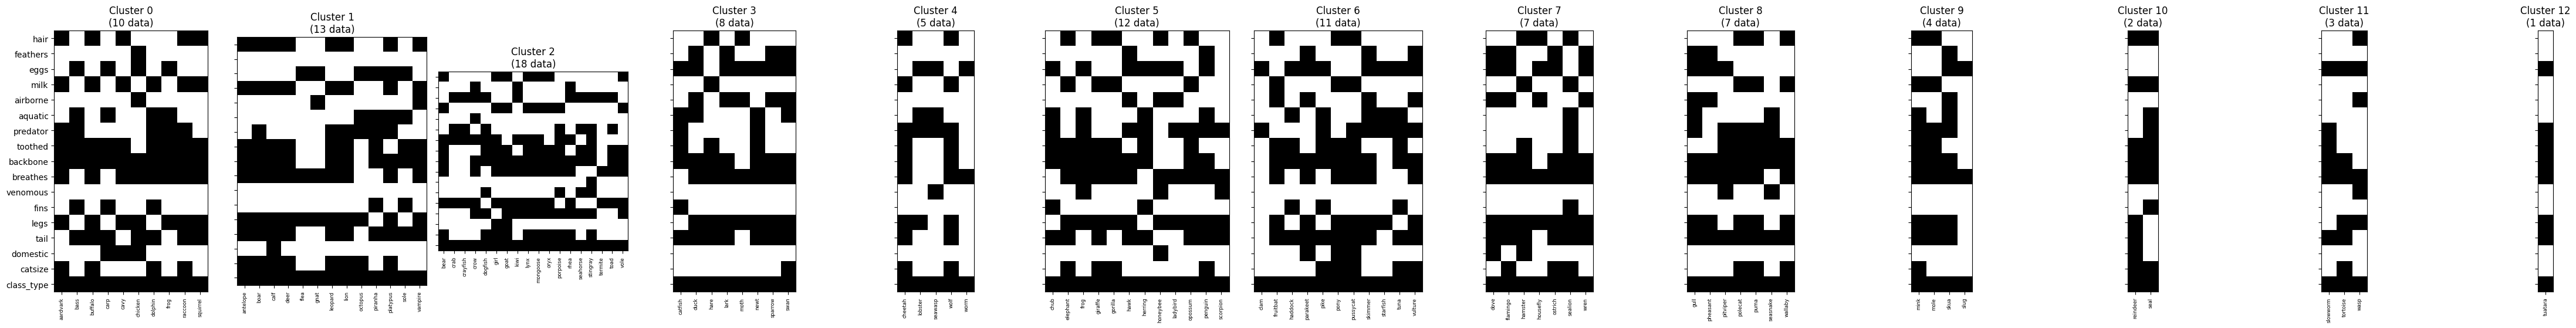

In [6]:
model = StickyCRP(alpha=1, delta=1, strict=False, stickiness=1.0)
for _, (name, feature) in tqdm(enumerate(zip(names, features))):
    model.add(Feature(name, feature))
run(model.clusters, feature_labels)

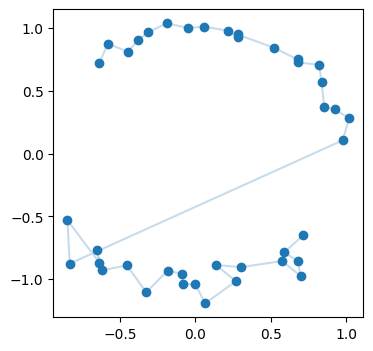

In [7]:
np.random.seed(0)  # for consistency, set the seed

def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

A = rotation_matrix( -np.pi/2 * 0.075)
x_train = [ np.array([[-1, 1]]).T / np.sqrt(2)]

for _ in range(19):
    x_train.append(np.matmul(A, x_train[-1]))

A = rotation_matrix( np.pi/2 * 0.055)
x_train.append(np.array([[-1, -1]]).T / np.sqrt(2))
for _ in range(19):
    x_train.append(np.matmul(A, x_train[-1]))

x_train = np.concatenate(x_train, axis=1).T

# add observation noise
x_train[:20, :] += np.random.randn(20, 2) * 0.04
x_train[20:, :] += np.random.randn(20, 2) * 0.12

plt.figure(figsize=(4,4))
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.plot(x_train[:, 0], x_train[:, 1], alpha=0.25)

# label of the true identies
y = np.concatenate([np.zeros(20), np.ones(20)])
color = plt.get_cmap('viridis').colors

0it [00:00, ?it/s]

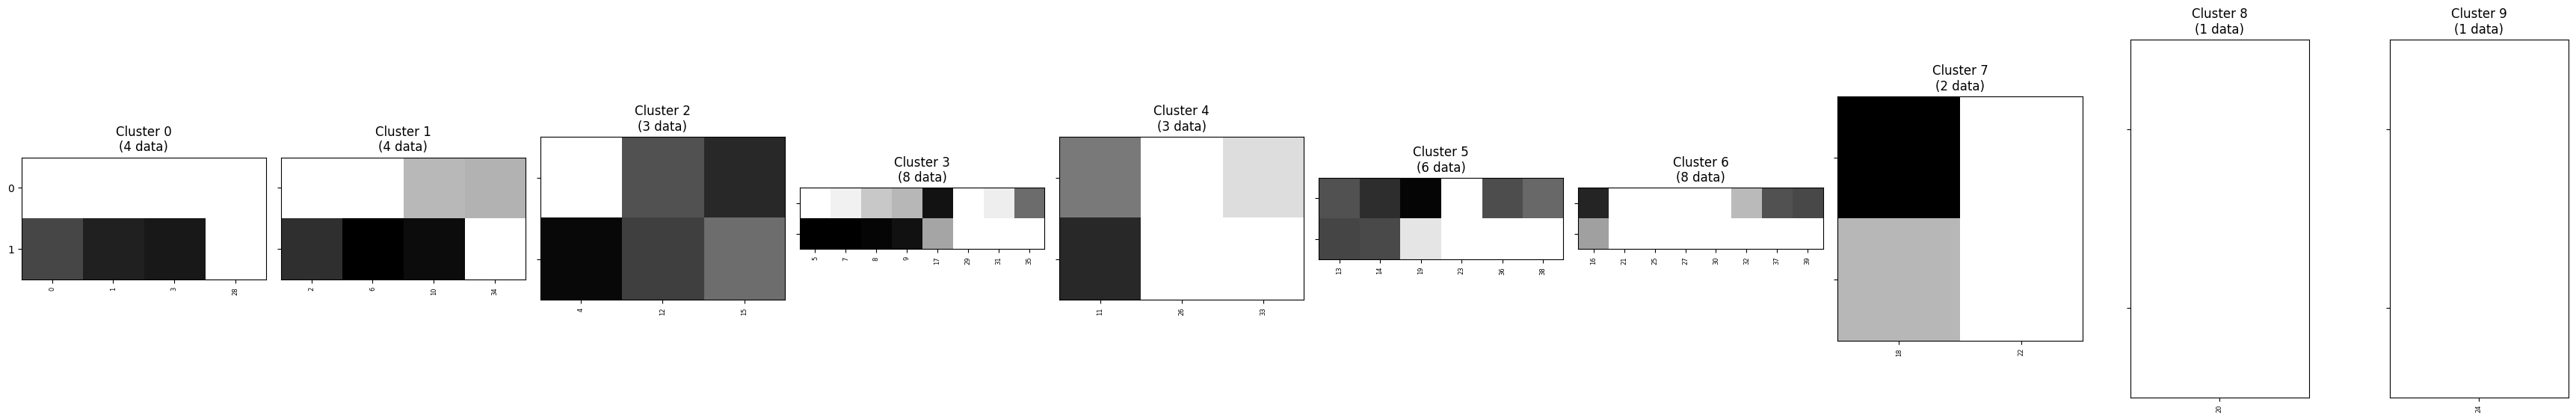

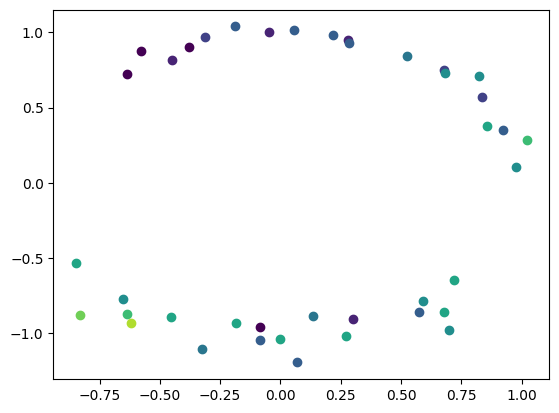

In [8]:
model = CRP(alpha=1, delta=1, strict=False, type="beta")
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))
run(model.clusters, [0, 1])
step = int(len(color) / len(model.clusters))
for i, cluster in enumerate(model.clusters):
    datapoints = np.array([item.values for item in cluster.items])
    datasequences = [item.label for item in cluster.items]
    for x, y in datapoints:
        plt.plot(x, y, '-o', color=color[i*step])
plt.show()

In [9]:
model = CRP(alpha=1, delta=1, strict=False, type="gaussian")
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))

0it [00:00, ?it/s]

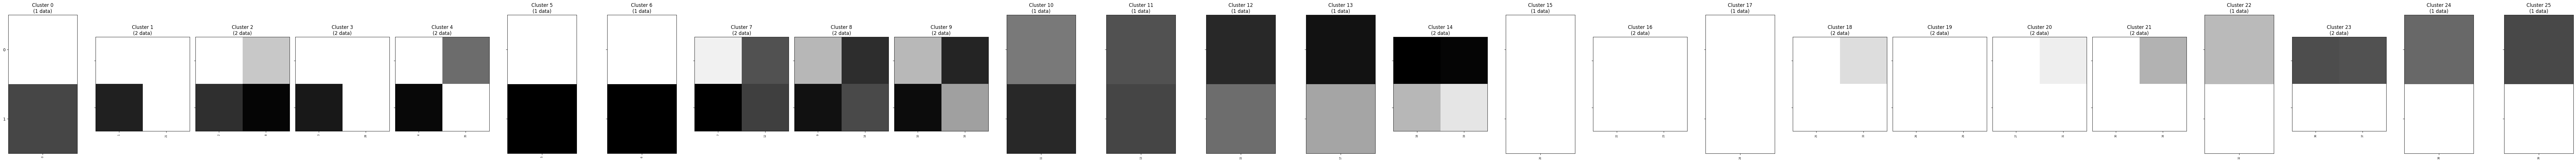

In [10]:
run(model.clusters, [0, 1])

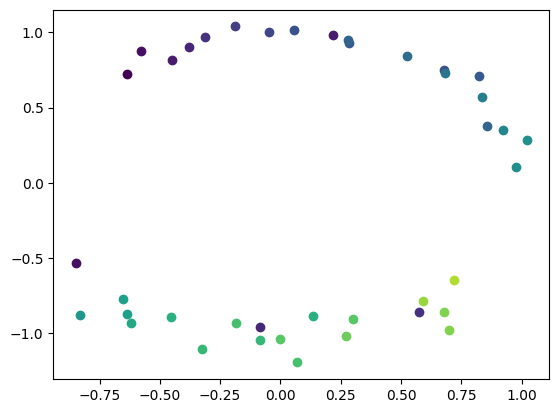

In [11]:
step = int(len(color) / len(model.clusters))
for i, cluster in enumerate(model.clusters):
    datapoints = np.array([item.values for item in cluster.items])
    datasequences = [item.label for item in cluster.items]
    for x, y in datapoints:
        plt.plot(x, y, '-o', color=color[i*step])
plt.show()

0it [00:00, ?it/s]

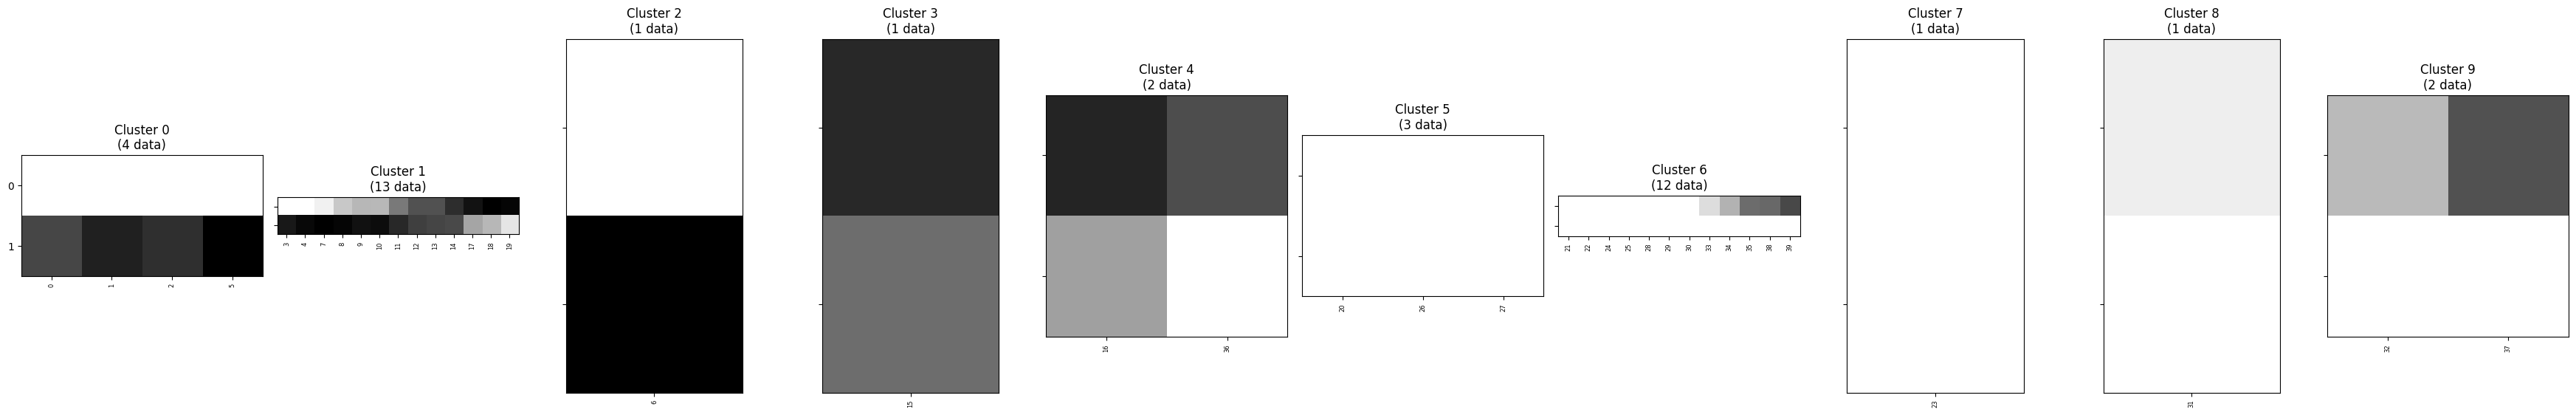

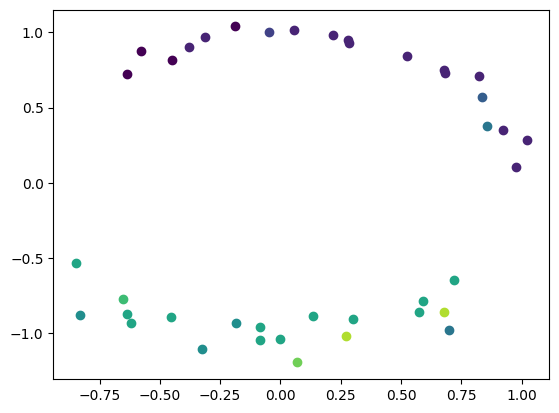

In [12]:
model = CRP(alpha=1, delta=1, strict=False, type="bayesian")
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))
run(model.clusters, [0, 1])
step = int(len(color) / len(model.clusters))
for i, cluster in enumerate(model.clusters):
    datapoints = np.array([item.values for item in cluster.items])
    datasequences = [item.label for item in cluster.items]
    for x, y in datapoints:
        plt.plot(x, y, '-o', color=color[i*step])
plt.show()

0it [00:00, ?it/s]

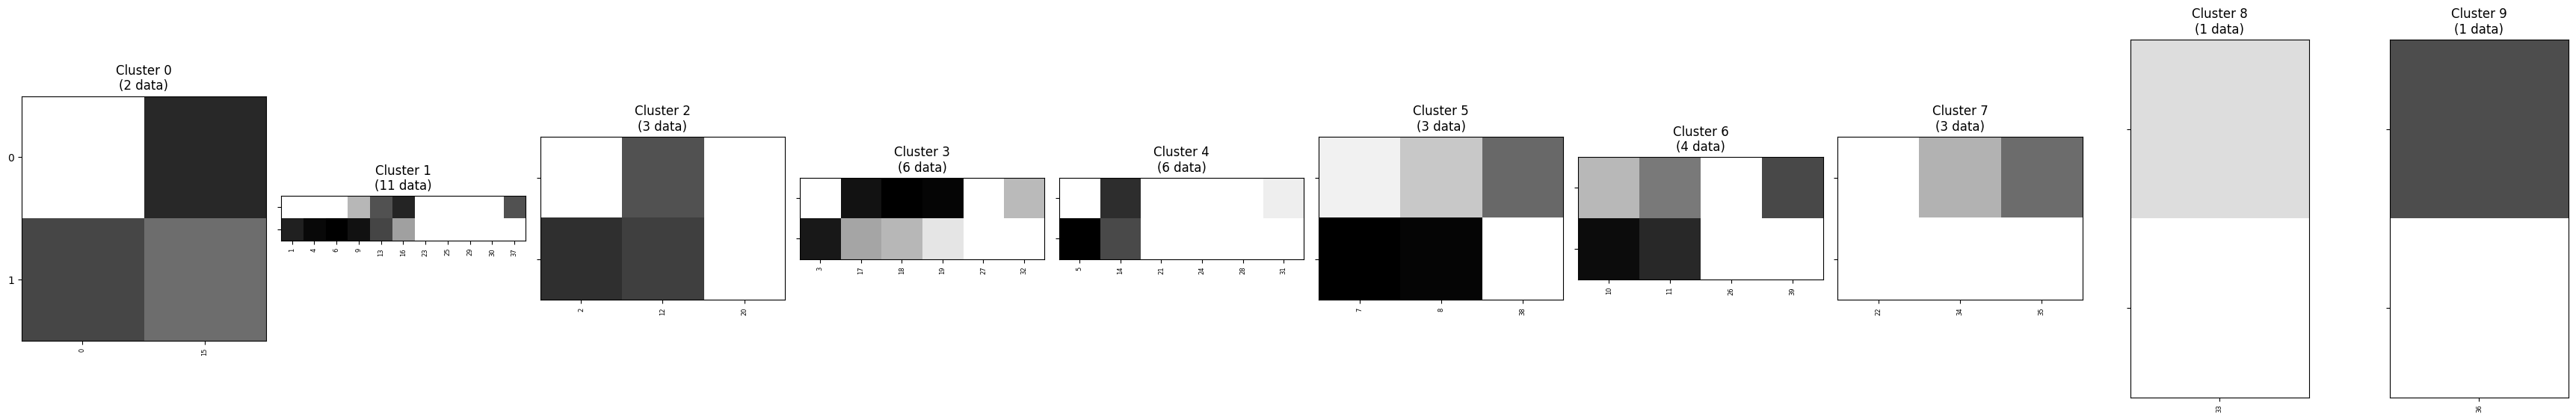

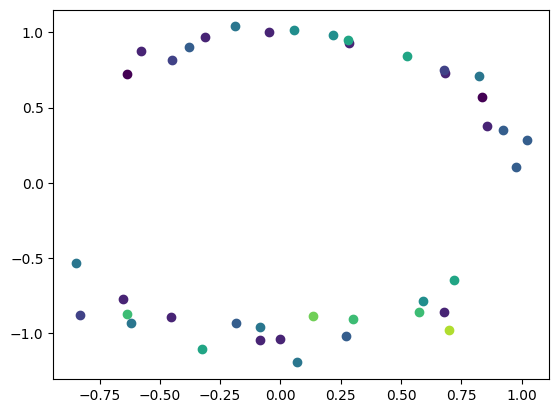

In [13]:
model = StickyCRP(alpha=1, delta=1, strict=False, stickiness=10.0, type="beta")
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))
run(model.clusters, [0, 1])
step = int(len(color) / len(model.clusters))
for i, cluster in enumerate(model.clusters):
    datapoints = np.array([item.values for item in cluster.items])
    datasequences = [item.label for item in cluster.items]
    for x, y in datapoints:
        plt.plot(x, y, '-o', color=color[i*step])
plt.show()

In [14]:
model = StickyCRP(alpha=1, delta=1, strict=False, stickiness=10.0, type="gaussian")
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))

0it [00:00, ?it/s]

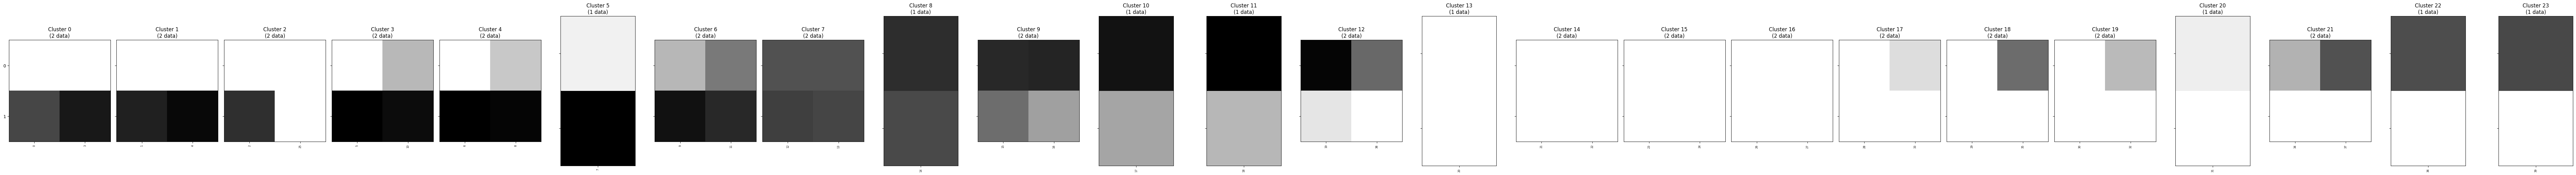

In [15]:
run(model.clusters, [0, 1])

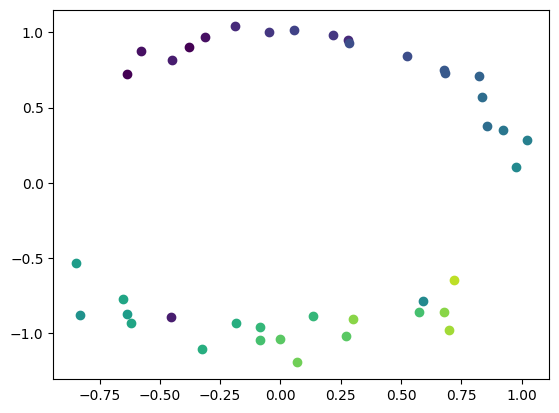

In [16]:
step = int(len(color) / len(model.clusters))
for i, cluster in enumerate(model.clusters):
    datapoints = np.array([item.values for item in cluster.items])
    datasequences = [item.label for item in cluster.items]
    for x, y in datapoints:
        plt.plot(x, y, '-o', color=color[i*step])
plt.show()

0it [00:00, ?it/s]

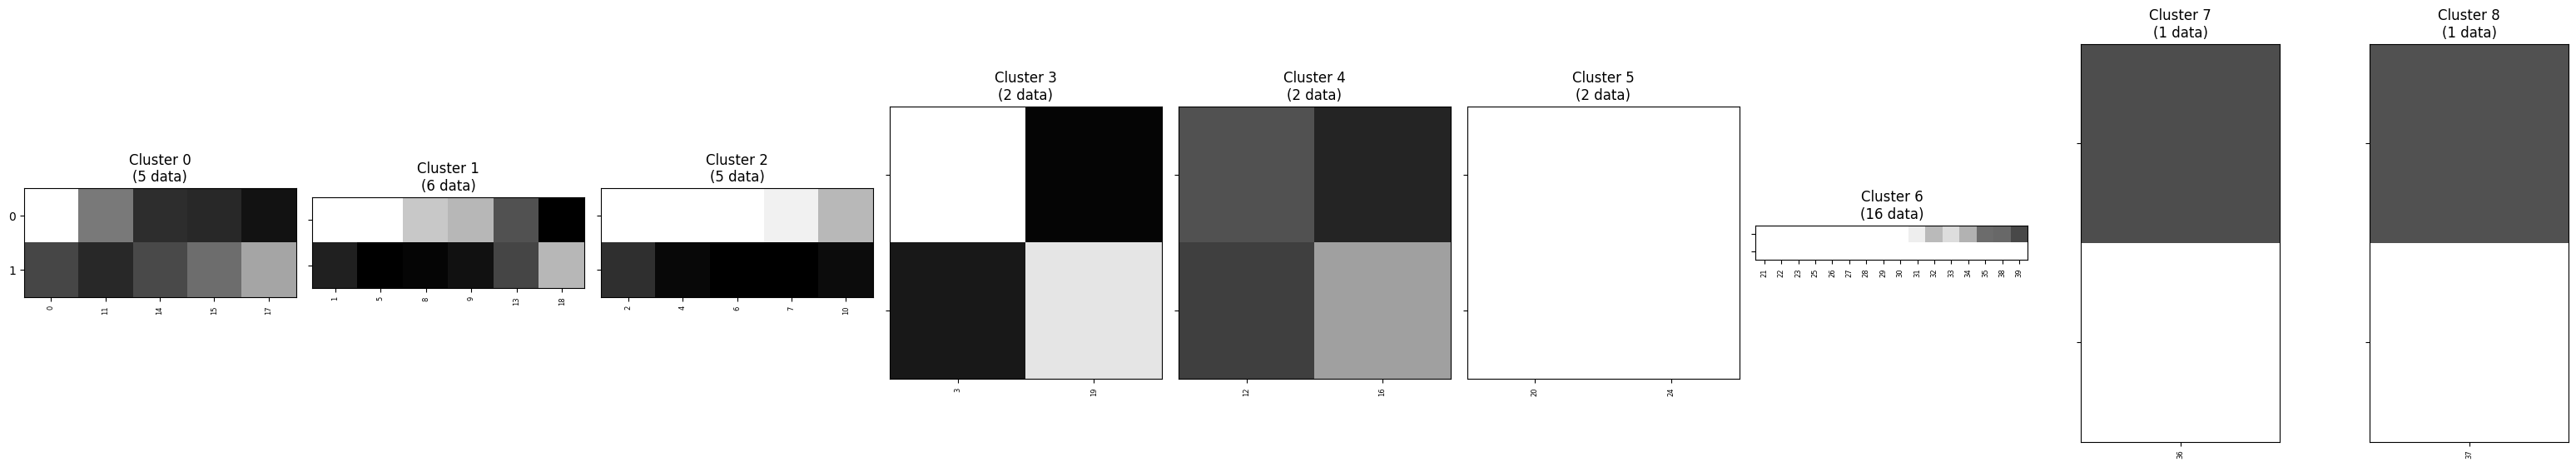

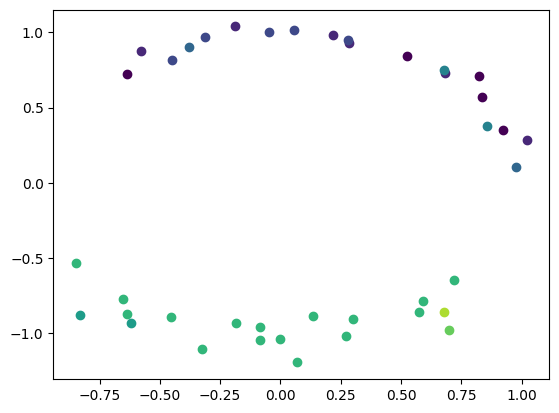

In [17]:
model = StickyCRP(alpha=1, delta=1, strict=False, stickiness=20.0, type="bayesian")
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))
run(model.clusters, [0, 1])
step = int(len(color) / len(model.clusters))
for i, cluster in enumerate(model.clusters):
    datapoints = np.array([item.values for item in cluster.items])
    datasequences = [item.label for item in cluster.items]
    for x, y in datapoints:
        plt.plot(x, y, '-o', color=color[i*step])
plt.show()